# Exploratory Data Analysis on Air Quality Index
### By Vedant Thakur

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AQI_EDA.csv')

In [3]:
data.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [8]:
data.isnull().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [9]:
data.shape

(18974, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18974 entries, 0 to 18973
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18974 non-null  object
 1   Country    18974 non-null  object
 2   Status     18974 non-null  object
 3   AQI Value  18974 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 593.1+ KB


#### Converting Date into datetime format

In [10]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date',inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18974 entries, 2022-07-21 to 2025-05-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    18974 non-null  object
 1   Status     18974 non-null  object
 2   AQI Value  18974 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 592.9+ KB


In [12]:
data.describe()

,AQI Value
count,18974.000000
mean,63.690629
std,50.213029
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


### Visulisation on Air Quality Index

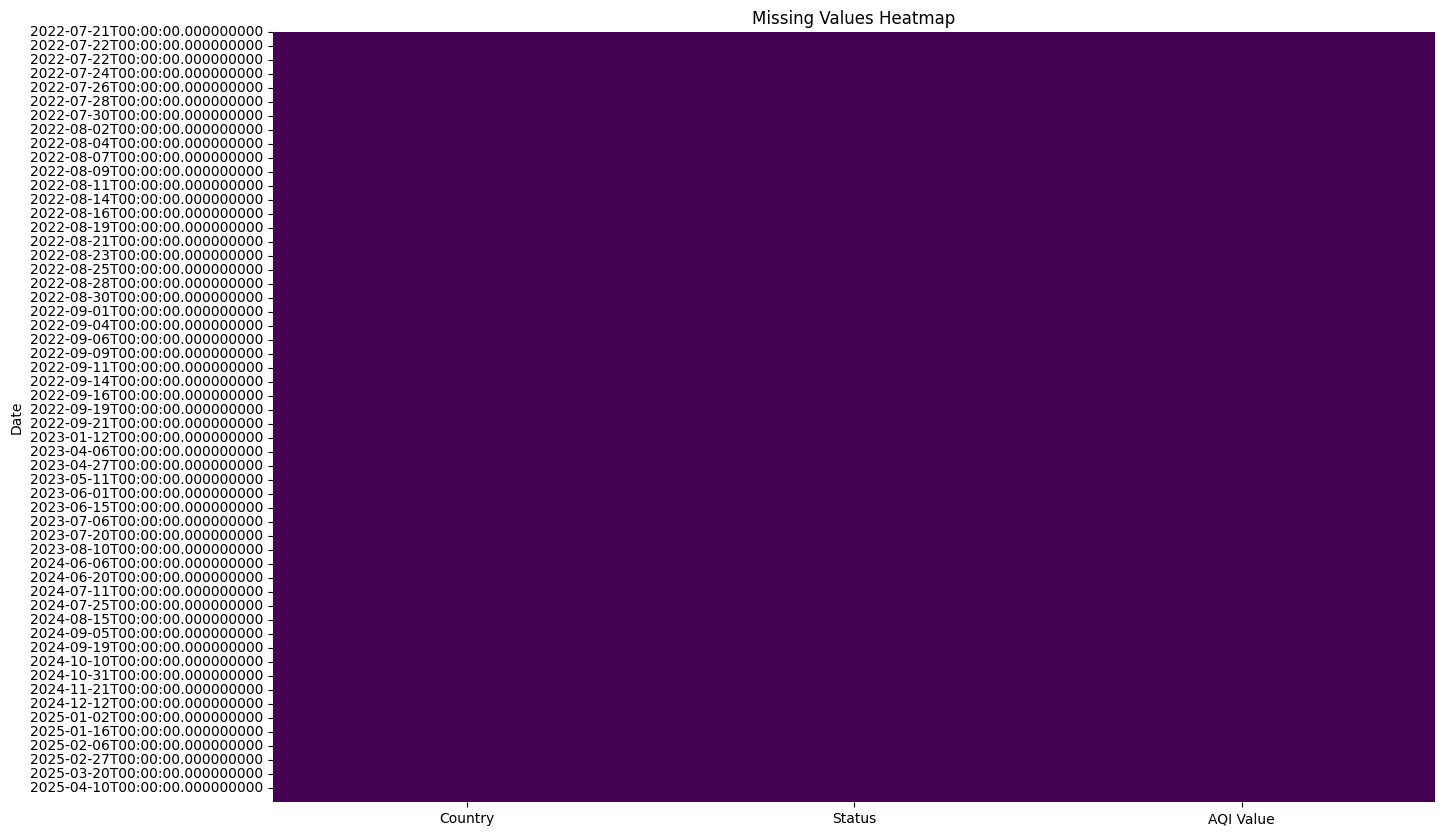

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

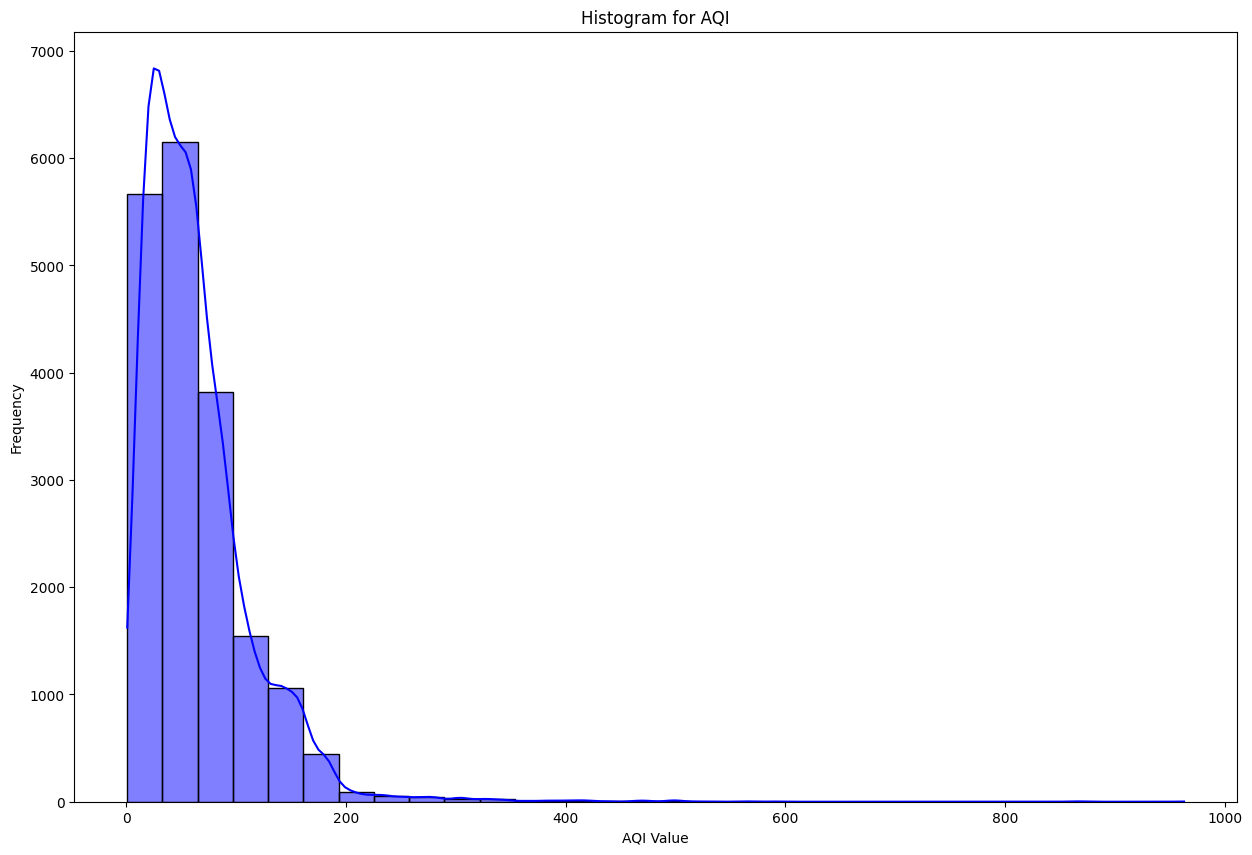

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(data['AQI Value'], label='AQI', bins=30, kde=True, color='b')
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title('Histogram for AQI')
plt.show()

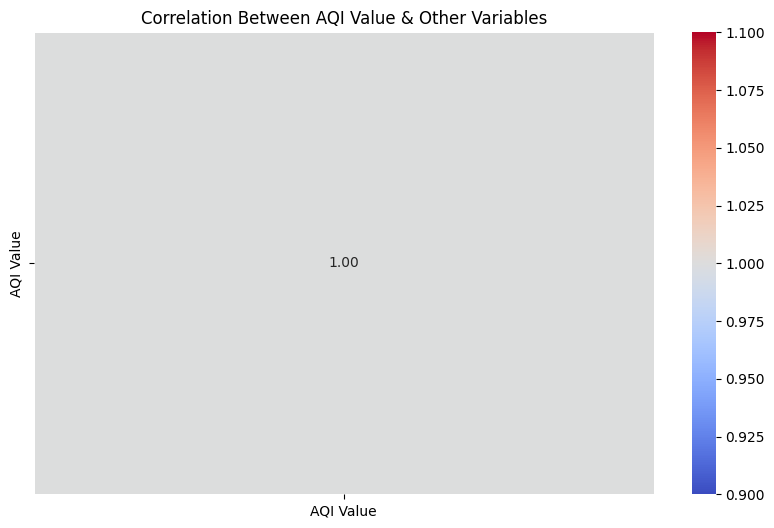

In [26]:
numeric_data = data.select_dtypes(include=['number'])

# Check if numeric_df is empty (to prevent errors)
if numeric_data.shape[1] > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Between AQI Value & Other Variables")
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

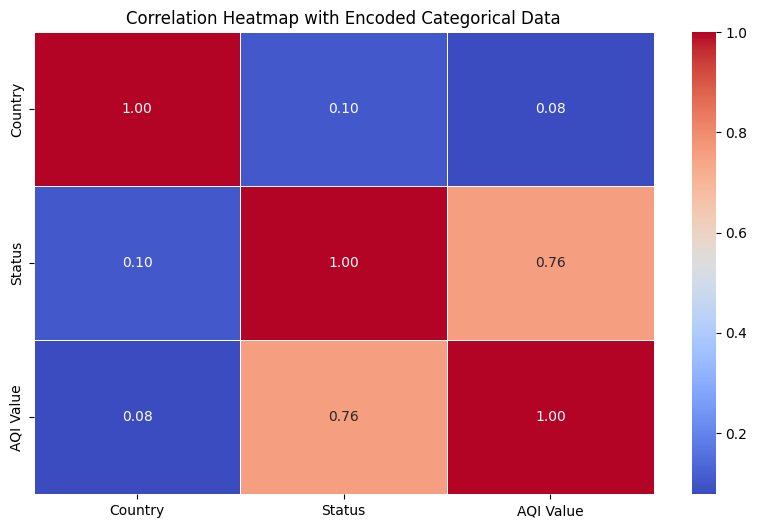

In [25]:
data_encoded = data.copy()
data_encoded['Country'] = data_encoded['Country'].astype('category').cat.codes
data_encoded['Status'] = data_encoded['Status'].astype('category').cat.codes

# Compute correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Encoded Categorical Data")
plt.show()